**Genie Hays**<br>
**MSDS 650 - Week 2**<br>
**Calculating Probability**<br>




##**I. Introduction**

This week's assignment provides practice in describing a dataset, handling missing data values, imputing, displaying data distribution and probablity calculations.

The following datasets were provided for this assignment: flights.csv, airlines.csv, airports.csv The flights.csv dataset was used to practice probability calculations. However, the other two datasets, airlines.csv and airports.csv, provided interesting reference information. The analysis provided below is only one approach to the assignment requirements.

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pylab as plt
%matplotlib inline

##**II. Methods, III. Code and IV. Analysis of Results**

### Loading, inspecting for missing values and cleaning the data.
I'm starting out with the flight dataset that was cleaned with Clean_Flights_data.ipynb.

In [ ]:
data_df = pd.read_csv('../assign_wk2/flights_clean.csv', low_memory=False)

<div class="alert alert-block alert-info">
<b>Why didn't I include the pd.read_csv low_memory argument?</b>  <br>
Visually inspecting the data in Sublime first it shows a couple of columns within the dataset that have a mixed data type. If you did not perform a visual inspection and determined this, Pandas would have presented a warning.<br>

I could have used dropna() when loading the data. However, if I did that when loading the dataset, it would have lost several of the columns needed for analysis. So, we will clean things up after the analysis.
</div>

In [ ]:
data_df.head(10)

,year,month,day,day_of_week,airline,flight_number,origin_airport,destination_airport,scheduled_departure,departure_time,departure_delay,scheduled_time,elapsed_time,scheduled_arrival,arrival_time,arrival_delay,diverted,cancelled
0,2015,1,1,4,AS,98,ANC,SEA,5,2354.0,-11.0,205.0,194.0,430,408.0,-22.0,0,0
1,2015,1,1,4,AA,2336,LAX,PBI,10,2.0,-8.0,280.0,279.0,750,741.0,-9.0,0,0
2,2015,1,1,4,US,840,SFO,CLT,20,18.0,-2.0,286.0,293.0,806,811.0,5.0,0,0
3,2015,1,1,4,AA,258,LAX,MIA,20,15.0,-5.0,285.0,281.0,805,756.0,-9.0,0,0
4,2015,1,1,4,AS,135,SEA,ANC,25,24.0,-1.0,235.0,215.0,320,259.0,-21.0,0,0
5,2015,1,1,4,DL,806,SFO,MSP,25,20.0,-5.0,217.0,230.0,602,610.0,8.0,0,0
6,2015,1,1,4,NK,612,LAS,MSP,25,19.0,-6.0,181.0,170.0,526,509.0,-17.0,0,0
7,2015,1,1,4,US,2013,LAX,CLT,30,44.0,14.0,273.0,249.0,803,753.0,-10.0,0,0
8,2015,1,1,4,AA,1112,SFO,DFW,30,19.0,-11.0,195.0,193.0,545,532.0,-13.0,0,0
9,2015,1,1,4,DL,1173,LAS,ATL,30,33.0,3.0,221.0,203.0,711,656.0,-15.0,0,0


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5245484 entries, 0 to 5245483
Data columns (total 18 columns):
 #   Column               Dtype  
---  ------               -----  
 0   year                 int64  
 1   month                int64  
 2   day                  int64  
 3   day_of_week          int64  
 4   airline              object 
 5   flight_number        int64  
 6   origin_airport       object 
 7   destination_airport  object 
 8   scheduled_departure  int64  
 9   departure_time       float64
 10  departure_delay      float64
 11  scheduled_time       float64
 12  elapsed_time         float64
 13  scheduled_arrival    int64  
 14  arrival_time         float64
 15  arrival_delay        float64
 16  diverted             int64  
 17  cancelled            int64  
dtypes: float64(6), int64(9), object(3)
memory usage: 720.4+ MB



<b>Where did the non-null attribute information go?</b></br>
Since our dataset is so large, that information is excluded from this view. We will test for it outside of info() function.
</div>

In [ ]:
# count the number of NaN in each column of the dataset
data_df.isnull().sum()

year                       0
month                      0
day                        0
day_of_week                0
airline                    0
flight_number              0
origin_airport             0
destination_airport        0
scheduled_departure        0
departure_time             0
departure_delay            0
scheduled_time             1
elapsed_time           14354
scheduled_arrival          0
arrival_time            2512
arrival_delay              0
diverted                   0
cancelled                  0
dtype: int64

#### Reducing the dataset width
There are still columns that have missing values: elapsed_time and arrival_time. I don't believe either of these will be useful in the analysis, so I'm going to drop them. Also, I don't believe that I will need day_of)week, airline, flight_number, departure_time, departure_delay, scheduled_time, scheduled_arrival going forward so let's drop those too. However, just in case, I'll make a copy of data_df first, so it's easier to get it back if needed.

In [ ]:
data_df.columns

Index(['year', 'month', 'day', 'day_of_week', 'airline', 'flight_number',
       'origin_airport', 'destination_airport', 'scheduled_departure',
       'departure_time', 'departure_delay', 'scheduled_time', 'elapsed_time',
       'scheduled_arrival', 'arrival_time', 'arrival_delay', 'diverted',
       'cancelled'],
      dtype='object')

In [ ]:
# make a copy of the full dataset
reduced_df = data_df.copy()

# columns to delete
delete_cols = ['day_of_week', 'airline', 'flight_number','departure_time','departure_delay', 'scheduled_time', 'elapsed_time','scheduled_arrival', 'arrival_time']
reduced_df.drop(delete_cols,axis=1,inplace=True)

In [ ]:
reduced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5245484 entries, 0 to 5245483
Data columns (total 9 columns):
 #   Column               Dtype  
---  ------               -----  
 0   year                 int64  
 1   month                int64  
 2   day                  int64  
 3   origin_airport       object 
 4   destination_airport  object 
 5   scheduled_departure  int64  
 6   arrival_delay        float64
 7   diverted             int64  
 8   cancelled            int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 360.2+ MB


In [ ]:
reduced_df.shape

(5245484, 9)

Time to investigate the cancelled and diverted fields.

In [ ]:
reduced_df.diverted.value_counts().sort_index(ascending=False)

1      14354
0    5231130
Name: diverted, dtype: int64

In [ ]:
reduced_df.cancelled.value_counts().sort_index(ascending=False)

0    5245484
Name: cancelled, dtype: int64

It appears that cancelled can be dropped. As for diverted, I'm going to remove flights that were diverted from the dataset too.

In [ ]:
reduced_df.drop(data_df[data_df.diverted == 1].index, inplace=True)

In [ ]:
reduced_df.drop(['cancelled','diverted'],axis=1,inplace=True)

In [ ]:
reduced_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5231130 entries, 0 to 5245483
Data columns (total 7 columns):
 #   Column               Dtype  
---  ------               -----  
 0   year                 int64  
 1   month                int64  
 2   day                  int64  
 3   origin_airport       object 
 4   destination_airport  object 
 5   scheduled_departure  int64  
 6   arrival_delay        float64
dtypes: float64(1), int64(4), object(2)
memory usage: 319.3+ MB


In [ ]:
reduced_df.shape

(5231130, 7)

### Provide an analysis of delayed flights based on the airport the flight originated from.
Is the distribution of delayed flights normally distributed? <br>Describe the shape of the distribution based on the QQ-plot.

Start out by looking at the a histogram of the arrival data.

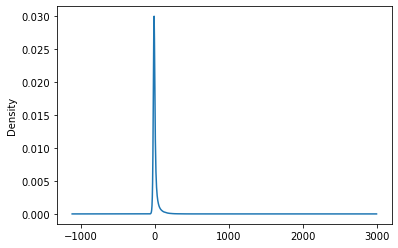

In [ ]:
arrival_data = reduced_df.arrival_delay
ax = arrival_data.plot.kde()

Well, that's an interesting plot! However, if we stop and think about it, we normal distribution is not expected. The airline industry is built on a series of connecting flights. A normal distribution in arrivals would cause all kinds of issues. Also to be normally distributed, we would have to have just as many flights arriving early as arriving late. 

In a perfect world, we would expect all of the data to be tightly clustered around 0. Meaning that flights are within a couple of minutes of the scheduled arrival time, either early or late.

Let's see what the QQ-plot looks like in this case.

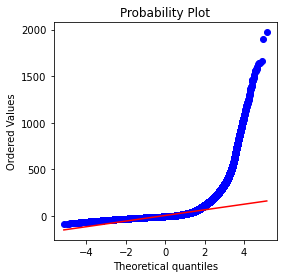

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))
stats.probplot(arrival_data, plot=ax)

plt.show()

As expected, the distribution of the arrival data (reduced_df.arrival_delay) is not normal. But that makes sense in this particualr case.  

However, the QQ-plot can also be used to describe the data overall. I can see that the distribution is slightly skewed right and the two tails of the dataset are not equal in portion. It also appears that the right tail has some extreme values in the far end of the tail.

#### Probablity of being delayed based on originating airport
Definition of probablity state it is the likelihood of some event happening. 

Since we are calculating the likelihood of a flight being delayed based on it's originating airport, we need to determine the total number of flights that had a delayed arrival based on their originating airport. Then to get the probability, we divide those numbers by the total number of flights in the full dataset.  Glad I still have the full dataset around!

First lets see how many originating airports we have.

In [ ]:
prob_df = reduced_df.copy()
prob_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5231130 entries, 0 to 5245483
Data columns (total 7 columns):
 #   Column               Dtype  
---  ------               -----  
 0   year                 int64  
 1   month                int64  
 2   day                  int64  
 3   origin_airport       object 
 4   destination_airport  object 
 5   scheduled_departure  int64  
 6   arrival_delay        float64
dtypes: float64(1), int64(4), object(2)
memory usage: 319.3+ MB


In [ ]:
prob_df.shape

(5231130, 7)

Let's count up the number of delayed flights per originating airport. Remember, a positive arrival_delay means that the flight was delayed.

In [ ]:
delays_per_airport = prob_df[prob_df.arrival_delay > 0].groupby('origin_airport').size()
delays_per_airport

origin_airport
ABE     826
ABI     686
ABQ    6965
ABR     246
ABY     309
       ... 
WRG     236
WYS      58
XNA    3727
YAK     159
YUM     627
Length: 322, dtype: int64

<div class="alert alert-block alert-info">
<b>Aggregation of Delayed Flights: What all does that command do?</b>  <br>
   1. Filter the df down to only looking at flights with a positive arrival_delay <br>
   2. Grouped the output of from step 1 by origin_airport <br>
   3. Used size() to get a total number for each origin_airport
    
We can check this by filtering the df for delayed flights for a specific origin_airport and compare the numbers.
</div>

In [ ]:
prob_df[(prob_df.arrival_delay > 0) & (prob_df.origin_airport == 'ABE')]

,year,month,day,origin_airport,destination_airport,scheduled_departure,arrival_delay
14058,2015,1,2,ABE,ORD,600,6.0
24269,2015,1,2,ABE,ATL,1600,11.0
30508,2015,1,3,ABE,ORD,600,30.0
39900,2015,1,3,ABE,ATL,1600,20.0
41022,2015,1,3,ABE,DTW,1715,17.0
...,...,...,...,...,...,...,...
5210999,2015,12,29,ABE,ATL,1610,68.0
5211928,2015,12,29,ABE,ORD,1712,208.0
5217796,2015,12,30,ABE,ORD,639,49.0
5226920,2015,12,30,ABE,ATL,1610,44.0


WooHoo!!  We match!

At this point all we need to do is calculate the probabality of the number of delayed flights per origin_airport.  Remember this calculation will use the total number of flights in the prob_df.

In [ ]:
total_flights = len(prob_df)
total_flights

5231130

In [ ]:
prob_delay_airport = delays_per_airport.apply(lambda x: x/total_flights)
prob_delay_airport = prob_delay_airport.sort_values(ascending=False)
prob_delay_airport

origin_airport
ATL    0.021959
ORD    0.021655
DFW    0.017789
DEN    0.015438
LAX    0.015228
         ...   
VEL    0.000004
HYA    0.000004
DLG    0.000003
ITH    0.000003
CNY    0.000002
Length: 322, dtype: float64

In [ ]:
# a bit nicer output for all the origin_airports
for i in prob_delay_airport.items():
    p_delay = '%.6f'%(i[1]*100)
    print(f'A flight from {i[0]} has a {p_delay}% of being delayed')
        

A flight from ATL has a 2.195931% of being delayed
A flight from ORD has a 2.165517% of being delayed
A flight from DFW has a 1.778851% of being delayed
A flight from DEN has a 1.543758% of being delayed
A flight from LAX has a 1.522826% of being delayed
A flight from IAH has a 1.143615% of being delayed
A flight from PHX has a 1.113947% of being delayed
A flight from SFO has a 1.073879% of being delayed
A flight from LAS has a 1.011196% of being delayed
A flight from SEA has a 0.832421% of being delayed
A flight from CLT has a 0.792200% of being delayed
A flight from MCO has a 0.790001% of being delayed
A flight from BOS has a 0.740471% of being delayed
A flight from MSP has a 0.717646% of being delayed
A flight from DTW has a 0.693560% of being delayed
A flight from LGA has a 0.692699% of being delayed
A flight from EWR has a 0.688303% of being delayed
A flight from BWI has a 0.668670% of being delayed
A flight from JFK has a 0.639938% of being delayed
A flight from MDW has a 0.60940

So what does this all mean? Remember probablity is the likelihood of an event occuring. Looking at our results above, the probablity (or likelihood) of a flight originating from ATL of being delayed is around 2%.

Let's take this one step further... We just calculated the likelihood of an ATL originating flight being delayed. The ATL airport is concerned that this number doesn't match their experiences on a daily basis. They could use a Bernoulli Distribution to determine the probability that 2% of their flights per day arrive to their destination late. 

First we need to get the avg number of flights per day.

In [ ]:
avg_daily = round(prob_df.groupby(['month','day']).size().mean())
avg_daily

15662

We known that a pmf will tell us the probability of x successes out of n trials. In this case a success is that an ATL flight arrives late at its destination. 

In [ ]:
pmf_atl = stats.binom.pmf(round(.02*avg_daily), n=avg_daily, p=0.021930)
pmf_atl

0.005485458407850754

Aaahhhh! The ATL airport officials like this number a lot better. There is a 2% probability that a flight originating from ATL will arrive late. However, on a daily basis, the probability that 2% of flights originating from their airport and arriving late at the destination airport is roughly .5%.

Yup! it's all in which statistics you present and how you present them. Both statements are accurate, but them tell a slightly different story. 

##What is the difference between probability and proportion?

#### Proportion of flights being delayed by originating airport
What is the difference between probablity and proportion? We have already defined probability above. Let's define proportion now. <br>

Proportion measures the likelihood that an event <b><i>has</i></b> occurred.

So, this means we need to calculate things a bit different. We need to produce a ratio of delayed vs non-delayed flights for each originating airport. The focus in a proporion is on what <b><i>has</i></b> happened. Where in a probability we are looking at what might happen.

In [ ]:
# copy of full dataset
prp_df = reduced_df.copy()
prp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5231130 entries, 0 to 5245483
Data columns (total 7 columns):
 #   Column               Dtype  
---  ------               -----  
 0   year                 int64  
 1   month                int64  
 2   day                  int64  
 3   origin_airport       object 
 4   destination_airport  object 
 5   scheduled_departure  int64  
 6   arrival_delay        float64
dtypes: float64(1), int64(4), object(2)
memory usage: 319.3+ MB


In [ ]:
prp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5231130 entries, 0 to 5245483
Data columns (total 7 columns):
 #   Column               Dtype  
---  ------               -----  
 0   year                 int64  
 1   month                int64  
 2   day                  int64  
 3   origin_airport       object 
 4   destination_airport  object 
 5   scheduled_departure  int64  
 6   arrival_delay        float64
dtypes: float64(1), int64(4), object(2)
memory usage: 319.3+ MB


To make things a little easier, I'm going to add a column that has a boolean value to represent whether a flight was delayed or not. <br>

Remember, if the arrival_delay is positive that means the flight was delayed. A flight that arrives on-time has a arrival_delay value of 0.

In [ ]:
prp_df['delayed'] = prp_df.arrival_delay.apply(lambda x: x>0)

In [ ]:
prp_df.head(10)

,year,month,day,origin_airport,destination_airport,scheduled_departure,arrival_delay,delayed
0,2015,1,1,ANC,SEA,5,-22.0,False
1,2015,1,1,LAX,PBI,10,-9.0,False
2,2015,1,1,SFO,CLT,20,5.0,True
3,2015,1,1,LAX,MIA,20,-9.0,False
4,2015,1,1,SEA,ANC,25,-21.0,False
5,2015,1,1,SFO,MSP,25,8.0,True
6,2015,1,1,LAS,MSP,25,-17.0,False
7,2015,1,1,LAX,CLT,30,-10.0,False
8,2015,1,1,SFO,DFW,30,-13.0,False
9,2015,1,1,LAS,ATL,30,-15.0,False


Now we can total up the number of flights per originating airport that were delayed and where not delayed.

In [ ]:
prp_df.groupby(['origin_airport','delayed']).size().unstack()

delayed,False,True
origin_airport,,
ABE,1401,826
ABI,1545,686
ABQ,11953,6965
ABR,417,246
ABY,557,309
...,...,...
WRG,413,236
WYS,150,58
XNA,5236,3727


Making progress! Now I need to flatten this out one more level and I'll be in business. Plus, I should probably store it somewhere too.

In [ ]:
actual_cnts = prp_df.groupby(['origin_airport','delayed']).size().unstack().reset_index()
actual_cnts

delayed,origin_airport,False,True
0,ABE,1401,826
1,ABI,1545,686
2,ABQ,11953,6965
3,ABR,417,246
4,ABY,557,309
...,...,...,...
317,WRG,413,236
318,WYS,150,58
319,XNA,5236,3727
320,YAK,491,159


<div class="alert alert-block alert-info">
<b>Couple of new Pandas functions above: What do those commands do?</b>  <br>
 * unstack(): Creates a new dataframe that represents a pivot table from the columns specified. If multiple columns are used in creating the pivot table, then you will get a multi-level index in the dataframe.<br>
 * reset_index(): Generally treset_index() will allow you to reset the index of a dataframe to a specific column.  In this case, since unstack() returned a multi-level index, reset_index() flattend the dataframe out to have a single index. 
</div>

In [ ]:
# replacing column names with nicer headers
cols = ['airport','delay_no','delay_yes']
actual_cnts.columns = cols

In [ ]:
actual_cnts.head(10)

,airport,delay_no,delay_yes
0,ABE,1401,826
1,ABI,1545,686
2,ABQ,11953,6965
3,ABR,417,246
4,ABY,557,309
5,ACK,323,162
6,ACT,1072,466
7,ACV,819,449
8,ACY,2094,1433
9,ADK,32,56


Since we are after the proportion of flights delayed that originated at each airport, I need to know the number of flights that originated at each airport.

In [ ]:
actual_cnts['total_flights'] = actual_cnts.delay_no + actual_cnts.delay_yes

actual_cnts.head(10)

,airport,delay_no,delay_yes,total_flights
0,ABE,1401,826,2227
1,ABI,1545,686,2231
2,ABQ,11953,6965,18918
3,ABR,417,246,663
4,ABY,557,309,866
5,ACK,323,162,485
6,ACT,1072,466,1538
7,ACV,819,449,1268
8,ACY,2094,1433,3527
9,ADK,32,56,88


We are after the proportion of flights delayed at each airport, which would be the number_delayed divided by the total_number of flights at each airport. I can add another column that has this value.

In [ ]:
actual_cnts['proportion_delayed'] = actual_cnts.delay_yes/actual_cnts.total_flights

actual_cnts.head(10)

,airport,delay_no,delay_yes,total_flights,proportion_delayed
0,ABE,1401,826,2227,0.370903
1,ABI,1545,686,2231,0.307485
2,ABQ,11953,6965,18918,0.368168
3,ABR,417,246,663,0.371041
4,ABY,557,309,866,0.356813
5,ACK,323,162,485,0.334021
6,ACT,1072,466,1538,0.302991
7,ACV,819,449,1268,0.354101
8,ACY,2094,1433,3527,0.406294
9,ADK,32,56,88,0.636364


Now to sort the df based on this column so I can easily see the least and the greatest proportions.

In [ ]:
actual_cnts = actual_cnts.sort_values('proportion_delayed')

In [ ]:
actual_cnts.head(5)

,airport,delay_no,delay_yes,total_flights,proportion_delayed
70,CNY,197,8,205,0.039024
314,VEL,177,23,200,0.115000
46,BTM,548,99,647,0.153014
189,LWS,491,97,588,0.164966
88,DIK,727,191,918,0.208061


In [ ]:
actual_cnts.tail(5)

,airport,delay_no,delay_yes,total_flights,proportion_delayed
13,AKN,31,32,63,0.507937
154,ILG,42,53,95,0.557895
246,PPG,39,67,106,0.632075
9,ADK,32,56,88,0.636364
133,GST,25,51,76,0.671053


Summing this all up, the originating airport with the smallest proportion of delayed flights is CYN and the originating airport with the largest proportion is GST.

#### Comparing Descriptive Statistics for CNY and GST
What is the mean and std of late arrival times for both of these airports?

Let's look at the statistical information.

In [ ]:
delay_stat = prp_df[(prp_df.arrival_delay > 0)].groupby('origin_airport').arrival_delay.describe()
delay_stat

,count,mean,std,min,25%,50%,75%,max
origin_airport,,,,,,,,
ABE,826.0,36.483051,63.478274,1.0,5.00,14.0,35.0,612.0
ABI,686.0,39.295918,63.122970,1.0,6.00,15.0,46.0,583.0
ABQ,6965.0,31.850826,60.603939,1.0,6.00,14.0,35.0,1636.0
ABR,246.0,42.211382,112.170443,1.0,6.00,13.5,29.0,916.0
ABY,309.0,37.530744,58.046303,1.0,5.00,15.0,46.0,454.0
...,...,...,...,...,...,...,...,...
WRG,236.0,31.881356,45.870710,1.0,5.00,14.0,35.0,259.0
WYS,58.0,18.034483,37.468099,1.0,2.25,5.0,14.5,194.0
XNA,3727.0,42.884626,69.859268,1.0,6.00,17.0,49.0,1017.0


<div class="alert alert-block alert-info">
<b>Stastical Summary: Pandas function describe()</b>  <br>
Generates the descriptive statistics for a specified column. Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.
</div>

Since we wrote the descriptive stats to a variable, we can query out those values for the two airports we are interested in.

In [ ]:
delay_stat.loc['CNY']

count     8.000000
mean     22.750000
std      22.429254
min       1.000000
25%       4.250000
50%      17.500000
75%      36.500000
max      63.000000
Name: CNY, dtype: float64

In [ ]:
delay_stat.loc['GST']

count     51.000000
mean      36.215686
std       39.086219
min        1.000000
25%       10.500000
50%       24.000000
75%       47.500000
max      179.000000
Name: GST, dtype: float64

Based on the mean and std information above, airport CNY has an avg delay of about 23 minutes with a std of 22 minutes.  Whereas airport GST has a larger avg delay (roughly 36 minutes) and a larger std. This tells me at CNY the variation in the delay times is tighter and on avg lower than those at airport GST.

###Use these two airports and compare their histograms of arrival delays with each other. 
Let's do a visual comparison for the airports from our mean and std results, CNY and GST, by plotting the delay times for both airports.

In [ ]:
# specify the bin for my histograms
bin_values = np.arange(start=0, stop=300, step=10)

<AxesSubplot:>

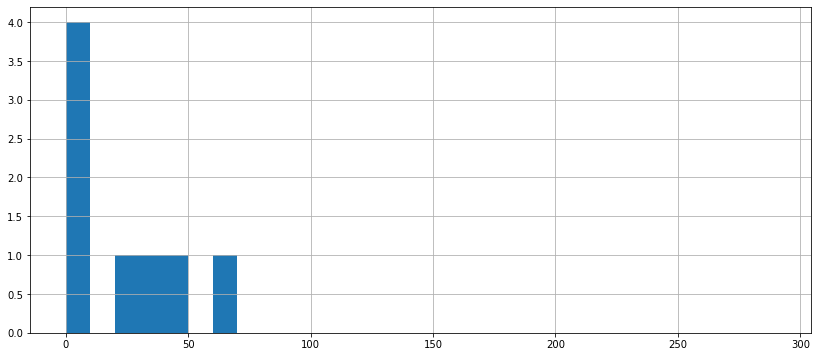

In [ ]:
cny_delays = prp_df[(prp_df.origin_airport == 'CNY')]
cny_delays.arrival_delay.hist(bins=bin_values, figsize=[14,6])

<AxesSubplot:>

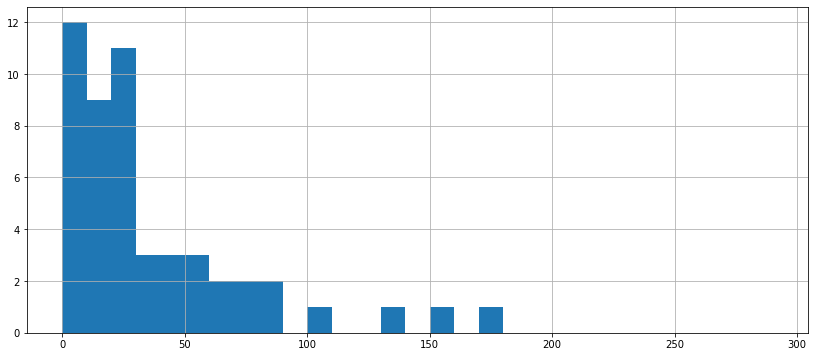

In [ ]:
gst_delays = prp_df[(prp_df.origin_airport == 'GST')]
gst_delays.arrival_delay.hist(bins=bin_values, figsize=[14,6])

##**V. Conclusion**
The histograms above support our conclusion for the comparison of the means and std. Airport CNY has a smaller spread in their delayed arrival at the destination ariport than GST does. However, the bulk of the delays for both airports are really small.<br>

I really enjoyed all the data cleanup practice that this assignment called for. i learned two new commands in my data cleanup efforts: unstack() to create a new dataframe that represents a pivot table of specified columns and reset_index() in order to reset the index of a dataframe to a specific column.<br>

Understanding the analysis required a working knowledge of the flight industry, such as determining that a normal distribution for delayed flights would not be normal.

##**VI. References**

MSDS 650 - Week 2 Content:<br>

1.) Class datasets provided for this assignment: flights.csv, airlines.csv, airports.csv

2.) From the Experts: Portion and Probability videos

3.) Week 2 Assignment

*   [Simple and Easy: Probabilities & Proportions](https://www.youtube.com/watch?v=7eNGVnd2FKM)
*   [Probability of sample proportions example](https://www.khanacademy.org/math/ap-statistics/sampling-distribution-ap/sampling-distribution-proportion/v/probability-of-sample-proportions-example)
<br>
<br>

**Practical Statistics for Data Scientists, 2nd Edition**<br>
by Peter Bruce, Andrew Bruce, Peter Gedeck<br>
Publisher: O'Reilly Media, Inc.<br>
Release Date: May 2020<br>
ISBN: 9781492072942<br><br>

**Probability for Machine Learning**<br>
by Jason Brownle<br>
https://machinelearningmastery.com/probability-for-machine-learning/

